<a href="https://colab.research.google.com/github/ocalru/EDP-I-Simulacion-I/blob/main/Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # Se importa la libreria numpy como "np"
import random # Se importa la libreria random
import matplotlib.pyplot as plt # Se importa la libreria matplotlib como "plt"






In [ ]:
# Definir la función a integrar
def funcion_objetivo(x): # Se define la funcion  funcion_objetivo() con valor de entrada x

    return np.sqrt(np.arctan(x)) # Devuelve el valor evaluado en x


In [ ]:
# Implementación del método Monte Carlo
def estimar_integral_mc(muestras):

    contador = 0  # Contador de puntos que caen bajo la curva

    for _ in range(muestras):
        x_rand = random.uniform(0, 1)  # Coordenada x aleatoria
        y_rand = random.uniform(0, 1)  # Coordenada y aleatoria

        if y_rand <= funcion_objetivo(x_rand):
            contador += 1  # Contamos los puntos bajo la curva

    # La estimación de la integral es la proporción de éxitos
    return contador / muestras


### Estimación de Integral con Monte Carlo ###
Valor de referencia (teórico): 0.62950
Estimación Monte Carlo con 100000 puntos: 0.63113
Diferencia absoluta: 0.00163


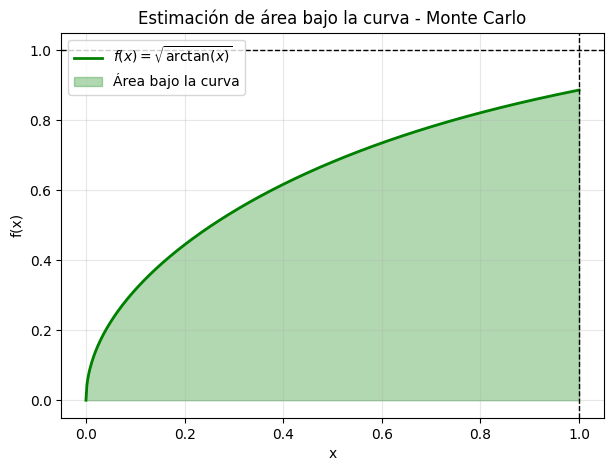

In [3]:
# Parámetros del problema
valor_referencia = 0.6295  # Valor conocido de la integral
num_puntos = 100000  # Número de muestras para la simulación

# Estimación de la integral
resultado_mc = estimar_integral_mc(num_puntos)

# Mostrar resultados
print("\n### Estimación de Integral con Monte Carlo ###")
print(f"Valor de referencia (teórico): {valor_referencia:.5f}")
print(f"Estimación Monte Carlo con {num_puntos} puntos: {resultado_mc:.5f}")
print(f"Diferencia absoluta: {abs(resultado_mc - valor_referencia):.5f}")

# Generar gráfica
x_vals = np.linspace(0, 1, 500)
y_vals = funcion_objetivo(x_vals)

plt.figure(figsize=(7, 5))
plt.plot(x_vals, y_vals, color="green", linewidth=2, label=r"$f(x) = \sqrt{\arctan(x)}$")
plt.fill_between(x_vals, y_vals, color="green", alpha=0.3, label="Área bajo la curva")
plt.axhline(1, color="black", linestyle="--", linewidth=1)  # Línea horizontal límite superior
plt.axvline(1, color="black", linestyle="--", linewidth=1)  # Línea vertical límite lateral

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Estimación de área bajo la curva - Monte Carlo")
plt.legend()
plt.grid(alpha=0.3)
plt.show()